In [70]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from matplotlib import colors

from neutronMS import MS_sim, GEN_constQgeom

In [71]:
mus=(0.37, 0.)
S_files = ('./data_Sq/Sqw_test/S_mesh.npy', './data_Sq/Sqw_test/Q_mesh.npy', './data_Sq/Sqw_test/omega_mesh.npy')

## Cuboid multiple

In [72]:
kf=5.8
theta=np.deg2rad(10)

In [82]:
X = np.linspace(.1, 3, 10)
KI = [4, 5, 5.8]

IsCUB = {}
ImCUB = {}

for ki in KI:
    IsCUB[ki] = []
    ImCUB[ki] = []

    for x in X:
        geom = ('cuboid', x, 4, 4)
        sim = MS_sim(geom, mus, S_files, ki, kf, theta,)
        sim.run(N=100000, N_bunch=40)
        IsCUB[ki].append(sim.Is)
        ImCUB[ki].append(sim.Im)

    IsCUB[ki] = np.array(IsCUB[ki])
    ImCUB[ki] = np.array(ImCUB[ki])



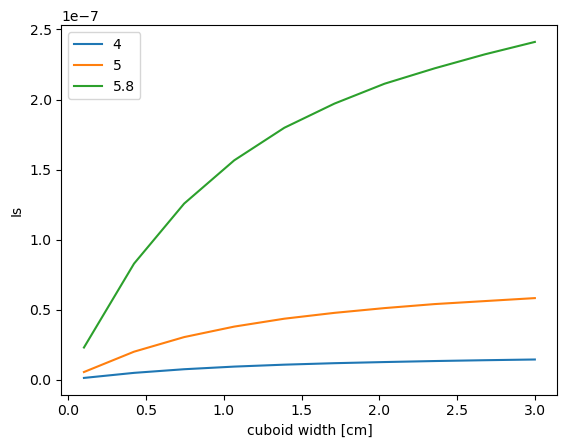

In [83]:
for ki in KI:
    plt.plot(X, IsCUB[ki], label=ki)

plt.xlabel('cuboid width [cm]')
plt.ylabel('Is')
plt.legend()

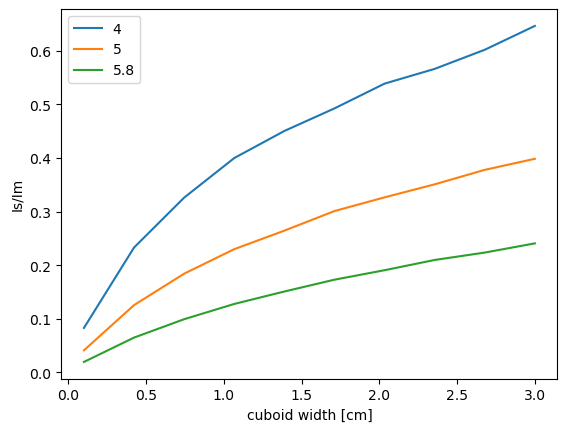

In [84]:
for ki in KI:
    plt.plot(X, (ImCUB[ki]/IsCUB[ki]), label=ki)

plt.xlabel('cuboid width [cm]')
plt.ylabel('Is/Im')
plt.legend()

## Test of the MS_sim class

In [76]:
kf=5.8
theta=1

In [77]:
X = np.linspace(1.1, 2, 10)
KI = [4, 5, 5.8]

IsAN = {}
ImAN = {}

for ki in KI:
    IsAN[ki] = []
    ImAN[ki] = []

    for x in X:
        geom = ('anular', 1, x, 4)
        sim = MS_sim(geom, mus, S_files, ki, kf, theta,)
        sim.run(N=100000, N_bunch=40)
        IsAN[ki].append(sim.Is)
        ImAN[ki].append(sim.Im)

    IsAN[ki] = np.array(IsAN[ki])
    ImAN[ki] = np.array(ImAN[ki])

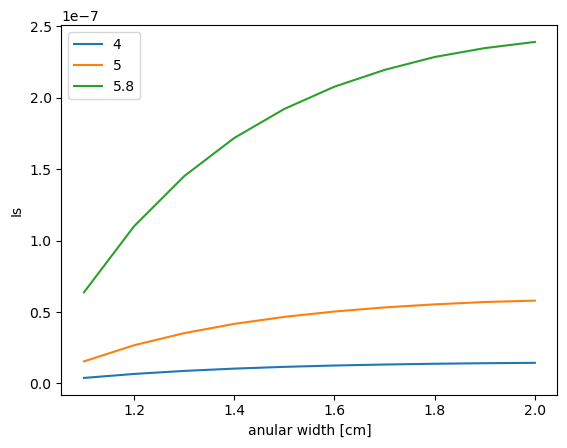

In [78]:
for ki in KI:
    plt.plot(X, IsAN[ki], label=ki)

plt.xlabel('anular width [cm]')
plt.ylabel('Is')
plt.legend()

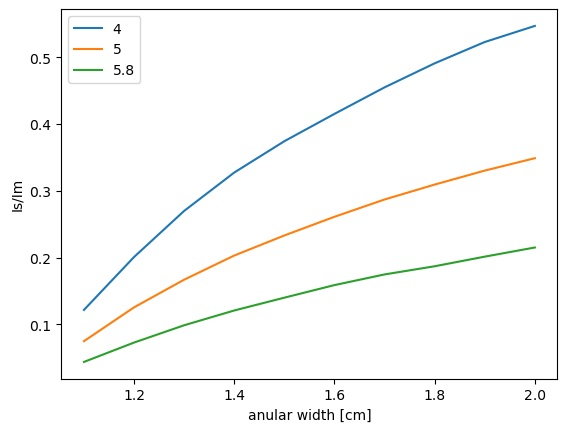

In [79]:
for ki in KI:
    plt.plot(X, (ImAN[ki]/IsAN[ki]), label=ki)

plt.xlabel('anular width [cm]')
plt.ylabel('Is/Im')
plt.legend()

# Geometry comparison

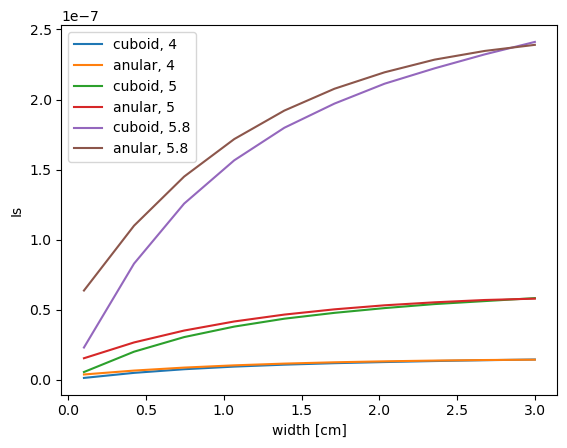

In [86]:
for ki in KI:
    plt.plot(X, IsCUB[ki], label='cuboid, '+str(ki))
    plt.plot(X, IsAN[ki] , label='anular, '+str(ki))
    
plt.xlabel('width [cm]')
plt.ylabel('Is')
plt.legend()

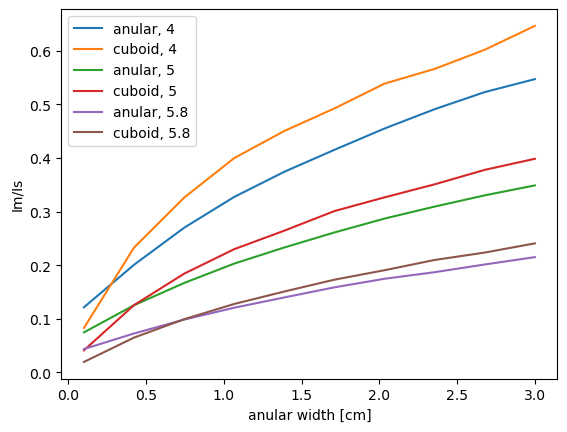

In [85]:
for ki in KI:
    plt.plot(X, (ImAN[ki]/IsAN[ki]), label='anular, '+str(ki))
    plt.plot(X, (ImCUB[ki]/IsCUB[ki]), label='cuboid, '+str(ki))

plt.xlabel('anular width [cm]')
plt.ylabel('Im/Is')
plt.legend()